# Programming for Data Science and Artificial Intelligence

## 0 Linear Algebra with Python
Adapted from [Geron]

### Readings:
- Linear Algebra Review - https://www.cs.cmu.edu/~zkolter/course/15-884/linalg-review.pdf

*Linear Algebra is the branch of mathematics that studies [vector spaces](https://en.wikipedia.org/wiki/Vector_space) and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (ie. moving it), etc.*

*Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.*

### Vectors
A vector is a quantity defined by a magnitude and a direction.  Often represented as column with brackets.  To distinguish from matrices, use lowercase letters with bold. 

#### Why we need vectors?

Vectors are used to represent your information in a compact form, ready to be computed.  Let's say I have a house with 4 rooms, 2 toilets, 10.2$m^2$.   This can be represent as a vector like this:

$$
house = \begin{pmatrix}
4 \\
2 \\
10.2 \\
\end{pmatrix}
$$

We also called this vector a three-dimensional vectors because it has three dimensions/features/explanatory variables/predictors (there are many names indeed) which are rooms, toilets, and size.

#### What if I have more house?

You can easily represent this as a **matrices** like this:

$$X = \begin{pmatrix}
4 & 2\\
2 & 1\\
10.2 & 4 \\
\end{pmatrix}$$

Here we have second house with 2 rooms, 1 toilet, and size of 4$m^2$.   Three things can be observed:
- When represented as matrices, each sample/record/observations (many names again!) is represented as columns, while the dimensions/features are represented as rows. ***(Note: in implementation, sometimes it can be reversed, so read the API carefully)***
- Matrices are often using UPPERCASE, and since what I have here is something that can be used to predict, we often called it X (big X), or the independent variables/explanatory variables/features/dimensions....
- N here is 2, and N is often used to mean "number of samples/observations/record"

Normally, X has a shape of m features x n samples with the following structure:

The number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$:

$$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$$

#### What some common operations you can do with matrices/vectors?

Vectors/matrices are so convenient because they allow quick operation across all observations:

##### Scalar multiplication

Let's say I want to multiply all my values by 3, I can do like this:

$$ 3 X =
\begin{bmatrix}
  3 \times 4 & 3 \times 2  \\
  3 \times 2 & 3 \times 1  \\
  3 \times 10.2 & 3 \times 4 \\
\end{bmatrix}$$

We called this 3 "scalar" and often is lowercase and is often represented by some mathematical symbol like lambda, alpha, gamma like this:

$$ \alpha = 3  $$
or 
$$ \lambda = 3 $$
or
$$ \gamma = 3 $$

##### Dot product

What if I want to multiply rooms by 2, toilets by 0.5, and size by 1 and add them together?

You can do a dot product with a vector like this:

$$X^T\beta = 
    \begin{bmatrix} 4 & 2 & 10.2 \\ 2 & 1 & 4 \end{bmatrix}
    \begin{bmatrix} 2 \\
                    0.5\\
                    1
    \end{bmatrix} = 
    \begin{bmatrix}
      4 \times 2 & + & 2 \times 0.5 & + & 10.2 \times 1 \\
      2 \times 2 & + & 1 \times 0.5 & + & 4 \times 1 \\
    \end{bmatrix}$$

Something important to observe:

- Notice that I transpose X first.  The transpose of a matrix $M$ is a matrix noted $M^T$
- The reason I transpose X first so that X can be dotted with $\beta$. X can only be dotted with $\beta$ only if number of columns in X is same as number of rows in $\beta$.   This is a very important observation.   Typically, in python, we describe $X^T$ shape of data in the form (2, 3) which means (2 number of samples, 3 features).  Similarly, we can describe $\beta$ shape as (3, ) which means 3 rows and 1 columns (can be 1 or nothing - this is a slightly unintuitive). **$X^T$ can only be dotted if (2, 3) @ (3, ) the $X^T$ columns matches $\beta$ rows.  The resultings shape is (2, ) which is ($X^T$ rows, $\beta$ columns).  Similarly, if our $\beta$ is of shape (3, 1), then $X^T @ \beta$ will be of shape (2, 1)**
- You probably are bashing me why I keep calling $\beta$.  The reason is that $\beta$ is a common mathematical symbol for **weights**.  Why $\beta$?....I don't know...I am not a mathematician but I guess it's likely because the first people who perform this operation called it "beta".
- The dot product of two vectors $\textbf{u}$ and $\textbf{v}$ is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

$$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$$

  where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

  Another way to calculate the dot product is:

$$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$$

##### Why dot product

Why dot product?  Actually dot product is a useful way to perform a linear combinations of weights.  Ok, probably I am talking some difficult term again, let me explain.

Let's say that house 1 has a price of 10 baht, and house 2 has a price of 5 baht, ok?  I have a third house with 3 rooms, 2 toilets, 15$m^2$, what will the price of this third house?

To answer, we can actually do like this.  We called price as $y$ commonly known as target/label/dependent variables which are something we want to predict and has a shape of (N, ) or (N, 1).   In our case, since we have y for two houses, our y will have a shape of (2, ) and can be written as:

$$y = \begin{pmatrix}
10 \\
5 \\
\end{pmatrix}$$

What I want to know, is the relationship between rooms, toilets, and size with price, like this:

$$X^T\beta = 
    \begin{bmatrix} 4 & 2 & 10.2 \\ 2 & 1 & 4 \end{bmatrix}
    \begin{bmatrix} ? \\
                    ?\\
                    ?
    \end{bmatrix} = 
    \begin{pmatrix}
10 \\
5 \\
\end{pmatrix}$$

Why do we want to know this ? or the $\beta$.  You will know soon or you probably already can guess. Using my manual eyeballing, let's say our $\beta$ is

$$\begin{bmatrix} 1 \\
                1 \\
                0.4
\end{bmatrix}$$

Thus:

$$X^T\beta = 
    \begin{bmatrix} 4 & 2 & 10.2 \\ 2 & 1 & 4 \end{bmatrix}
    \begin{bmatrix} 1 \\
                    1\\
                    0.4
    \end{bmatrix} = 
    \begin{bmatrix}
      4 \times 1 & + & 2 \times 1 & + & 10.2 \times 0.2 \\
      2 \times 1 & + & 1 \times 1 & + & 4 \times 0.2 \\
    \end{bmatrix} =
    \begin{pmatrix}
        10.08 \\
        4.6 \\
    \end{pmatrix}
$$

What do you think?  Is my $\beta$ ok?  Hmm...a lot of errors.  We commonly depict the predicted y using $\hat{y}$ and the actual y using $y$.  The errors can be commonly calculated using

$$ \frac{\sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2}{N} $$  which is

$$ \frac{(10.08 - 10)^2 + (4.6 - 4)^2}{N} = \frac{0.3664}{N} = \frac{0.3664}{2} = 0.1832 $$

We called this 0.1832 as **Mean squared errors (MSE)**.  Why square?  Simply so that errors will be positive, also bigger errors were emphasized.  One more big reason is because the derivatives can be easily found.  But let's talk more about this later in this course.

But the good thing is that because we find the $\beta$ already, you now can predict the third house price like this:

$$x_{3}\beta = 
    \begin{bmatrix} 3 & 2 & 15 \end{bmatrix}
    \begin{bmatrix} 1 \\
                    1\\
                    0.4
    \end{bmatrix} = 
    \begin{bmatrix}
      3 \times 1 & + & 2 \times 1 & + & 15 \times 0.4 \\
    \end{bmatrix} =
    \begin{pmatrix}
        11
    \end{pmatrix}
$$

Is that accurate?  I don't know!  But that's the basis how prediction/machine learning starts working....But the main purpose here is to show you that why we love vectors, and why python (specifically numpy) is used with the mindset of vectors.  Isn't it amazing?  Imagine a list of house, with one dot product and we can get all the predicted values.

By the way, I use $x_{3}$; small x represents each sample, and 3 here means sample 3.



### Python and vectors

In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [1]:
[4, 2, 10.2]

[4, 2, 10.2]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's `ndarray`, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors.  E.g., 

In [2]:
import numpy as np
house = np.array([4, 2, 10.2])
print(house)
print(house.shape)

[ 4.   2.  10.2]
(3,)


How about matrices? It can be easily represented using numpy follows:

In [3]:
X = np.array([
    [4, 2],
    [2, 1],
    [10.2, 4]
])
print(X)
print(X.shape)

[[ 4.   2. ]
 [ 2.   1. ]
 [10.2  4. ]]
(3, 2)


Scalar multiplication

In [4]:
alpha = 3
print(alpha * X)

[[12.   6. ]
 [ 6.   3. ]
 [30.6 12. ]]


Let's try create $\beta$ and perform dot product using <code>np.dot</code> or <code>.dot</code> or <code>@</code>
    
**Caution**: the `*` operator will perform an *elementwise* multiplication, *NOT* a dot product:

In [5]:
b = np.array([1, 1, 0.4])
print(b)
print(b.shape)

[1.  1.  0.4]
(3,)


Let's perform a dot product.  Dot product can be peformed using three ways:

In [6]:
print(np.dot(X.T, b))

print(X.T.dot(b))

print(X.T @ b)
print((X.T @ b).shape)  #if our actual y is (2, ), then we let w to be (n_features, )

[10.08  4.6 ]
[10.08  4.6 ]
[10.08  4.6 ]
(2,)


Let's say I have x3 like this.  I can use my beta to predict the price

In [7]:
x3 = np.array([3, 2, 15])

print(x3.T @ b)
print((x3.T @ b).shape)

11.0
()


Note: `Q @ R` is actually equivalent to `Q.__matmul__(R)` which is implemented by NumPy as `np.matmul(Q, R)`, not as `Q.dot(R)`. The main difference is that `matmul` does not support scalar multiplication, while `dot` does, so you can write `Q.dot(3)`, which is equivalent to `Q * 3`, but you cannot write `Q @ 3` ([more details](http://stackoverflow.com/a/34142617/38626)).

#### Main properties
* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.
* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

Here I also want to introduce a term called **matrix multiplication**.  The difference between matrix multiplication and dot product, dot product is simply the operation between two vectors.  But when you do that same operation between two matrices, it's called matrix multiplication (which contains many dot products)

- **matrix multiplication is *NOT* commutative**: in general $QR ≠ RQ$.  This is because if Q has shape of (2, 3) and R has shape of (3, 2), QR will have shape of (2, 2), and RQ will have shape (3, 3)
- **matrix multiplication *is* associative**, meaning that $Q(RS) = (QR)S$
- It is also ***distributive* over addition** of matrices, meaning that $(Q + R)S = QS + RS$. 

### Vectors as arrows

#### 2D vectors
Let's create a couple very simple 2D vectors to plot:

In [8]:
u = np.array([2, 5])
v = np.array([3, 1])

These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:

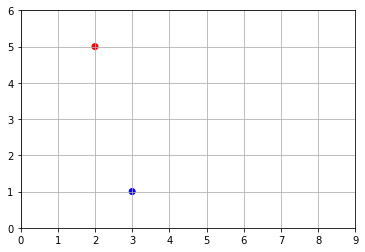

In [9]:
import matplotlib.pyplot as plt
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows:

In [10]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

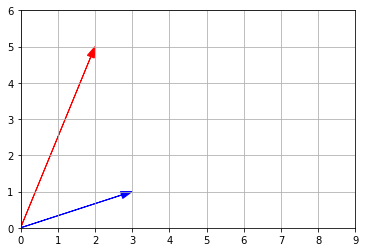

In [11]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

#### How about 3D, 4D, ...etc.?  

Well, a vector with 3 elements is an arrow or point in space, and a vector with N elements is an arrow or a point in an N-dimensional space… which most people find hard to imagine.

### Norm
The norm of a vector $\textbf{u}$, noted $\left \Vert \textbf{u} \right \|$, is a measure of the length (a.k.a. the magnitude) of $\textbf{u}$. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidian norm, which is defined as:

$$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$$

We could implement this easily in pure python, recalling that $$\sqrt x = x^{\frac{1}{2}}$$

In [12]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

However, it is much more efficient to use NumPy's `norm` function, available in the `linalg` (**Lin**ear **Alg**ebra) module:

In [13]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

### Addition
Vectors of same size can be added together. Addition is performed *elementwise*:

In [14]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Let's look at what vector addition looks like graphically:

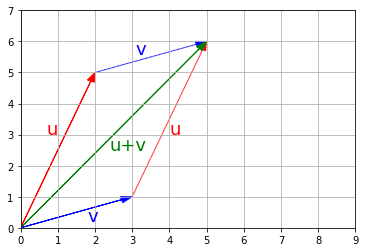

In [15]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is **commutative**, meaning that $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. You can see it on the previous image: following $\textbf{u}$ *then* $\textbf{v}$ leads to the same point as following $\textbf{v}$ *then* $\textbf{u}$.

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

### Multiplication by a scalar
Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number, for example:

In [16]:
print("1.5 *", v, "=")

1.5 * v

1.5 * [3 1] =


array([4.5, 1.5])

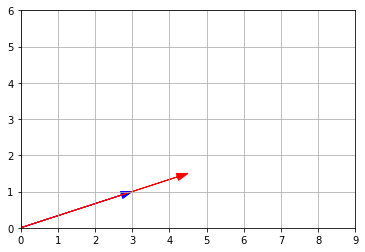

In [17]:
plot_vector2d(v, color="b")
plot_vector2d(1.5*v, color="r")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

#the red arrow block the blue arrow

What if you want to make the vector smaller?  Simply division.  Recall that division is the same as multiplication with something less than 1

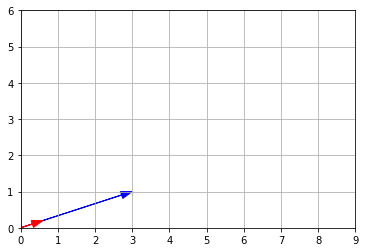

In [18]:
plot_vector2d(v, color="b")
plot_vector2d(0.2*v, color="r")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

### Zero, unit and normalized vectors
* A **zero-vector ** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{u}$, noted $\hat{\textbf{u}}$, is the unit vector that points in the same direction as $\textbf{u}$. It is equal to: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$




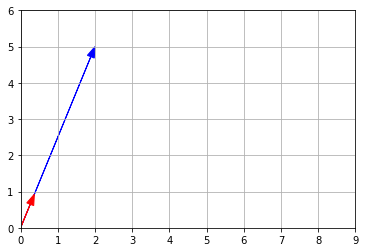

In [19]:
plot_vector2d(u, color="b")
plot_vector2d(u / LA.norm(u), color="r")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Type of matrices




A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

$$\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}$$

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

$$\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}$$

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

$$\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}$$

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

$$\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}$$

You can construct a diagonal matrix using NumPy's `diag` function:

In [20]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the `diag` function, it will happily extract the diagonal values:

In [21]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

$$\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}$$

Numpy's `eye` function returns the identity matrix of the desired size

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

The product of a matrix $M$ by the identity matrix (of matching size) results in the same matrix $M$. More formally, if $M$ is an $m \times n$ matrix, then:

$M I_n = I_m M = M$

This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$MI = IM = M$

For example:

In [23]:
print(X.shape)

I_n = np.eye(2)  #2 because X has two samples
I_m = np.eye(3)  #3 because X has three features

print(X @ I_n)

print(I_m @ X)

(3, 2)
[[ 4.   2. ]
 [ 2.   1. ]
 [10.2  4. ]]
[[ 4.   2. ]
 [ 2.   1. ]
 [10.2  4. ]]


### Geometric applications of matrix operations
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin).

Similarly, matrix operations have very useful geometric applications.

#### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:

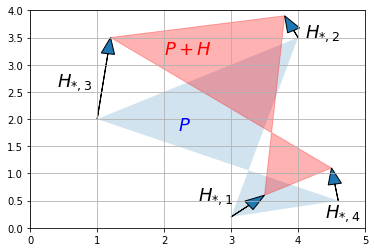

In [24]:
from matplotlib.patches import Polygon

P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])

H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

#matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, 
#not a $2 \times n$ array, so we just need to give it $P^T$:
plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

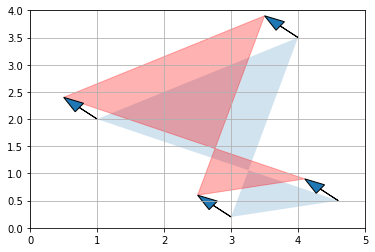

In [25]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

#### Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

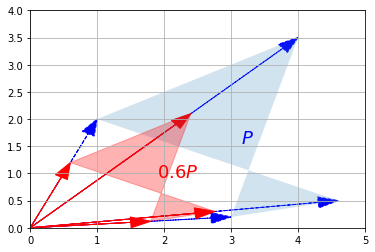

In [26]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

#### Matrix multiplication – Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a $1 \times 2$ matrix $$U = \begin{bmatrix} 1 & 0 \end{bmatrix}$$. This row vector is just the horizontal unit vector.

In [27]:
U = np.array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [28]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis:

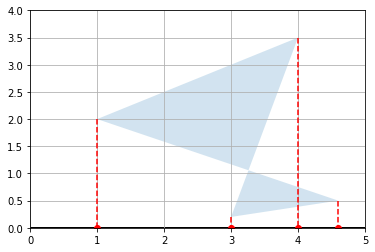

In [29]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

#### Matrix multiplication – Rotation
Now let's create a $2 \times 2$ matrix $V$ containing that gonna rotate around z-axis:

$$V = \begin{bmatrix} \cos(angle) & -\sin(angle) \\ \sin(angle) & \cos(angle) \end{bmatrix}$$

In [30]:
def rotMatrix(angle):
    c = np.cos(np.radians(angle))
    s = np.sin(np.radians(angle))
    return np.array([[c, -s], [s, c]])

Let's look at the product $VP$:

So what this matrix does is that it rotates P by the z-axis

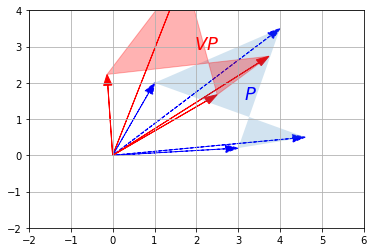

In [31]:
P_rotated = rotMatrix(30).dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

#### Matrix multiplication – Other linear transformations
More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$$

and $f$ is defined as:

$$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$$f(\textbf{u}) = F \textbf{u}$$

If we have a matrix $$G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a *shear mapping*:

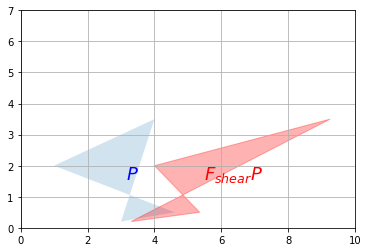

In [32]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

Let's look at how this transformation affects the **unit square**: 

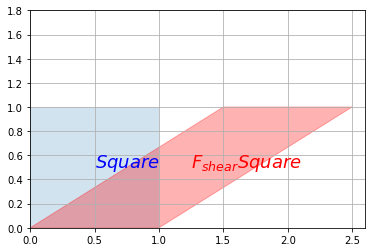

In [33]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

Now let's look at a **squeeze mapping**:

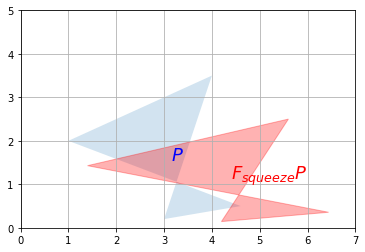

In [34]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

### Matrix inverse
Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? The answer is yes… sometimes! When it exists, such a matrix is called the **inverse** of $F$, and it is noted $F^{-1}$.

For example, the rotation, the shear mapping and the squeeze mapping above all have inverse transformations. Let's demonstrate this on the shear mapping:

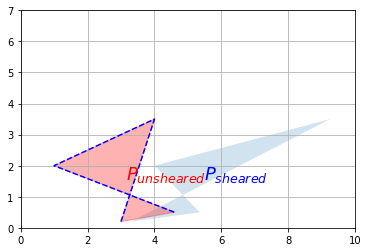

In [35]:
F_inv_shear = LA.inv(F_shear)
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. 

Also, note that not all square matrices can be inversed.  Such matrices are called **singular matrix** 

As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$$M \cdot M^{-1} = M^{-1} \cdot M = I$$

Another way to express this is that the inverse of the inverse of a matrix $M$ is $M$ itself:

$$((M)^{-1})^{-1} = M$$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

In [36]:
F_shear.dot(LA.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

### Determinant
The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$$

* Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.

For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$$

Using the method above, we get:

$$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):

$$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$$

$$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$$

$$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$$

Now we can calculate the final result:

$$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$$

To get the determinant of a matrix, you can call NumPy's `det` function in the `numpy.linalg` module:

In [37]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

One of the main uses of the determinant is to *determine* whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix *cannot* be inversed (it is a singular matrix), and if the determinant is not 0, then it *can* be inversed.

In [38]:
LA.det(F_shear)

1.0

The determinant can also be used to measure how much a linear transformation affects surface areas: for example, The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:

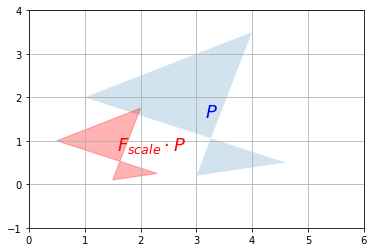

In [39]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{scale} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4$^{th}$ of the original polygon. Let's compute the determinant and check that:

In [40]:
LA.det(F_scale)

0.25

### Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

For example, let's decompose the shear transformation:

In [41]:
U, S_diag, V_T = LA.svd(F_shear)
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [42]:
S_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [43]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

In [53]:
V_T

array([[ 0.4472136 ,  0.89442719],
       [-0.89442719,  0.4472136 ]])

Now let's check that $U \cdot \Sigma \cdot V^T$ is indeed equal to `F_shear`:

In [44]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [45]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $V^T$:

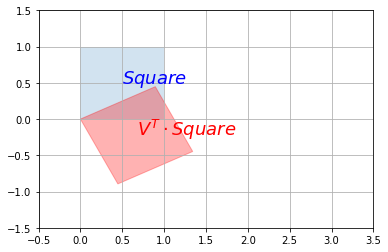

In [46]:
plot_transformation(Square, V_T.dot(Square), "$Square$", "$V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using $\Sigma$:

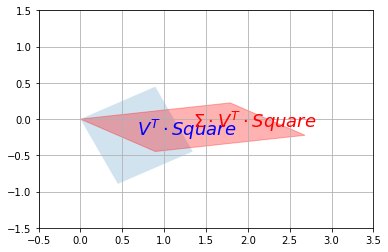

In [47]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Square$", "$\Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

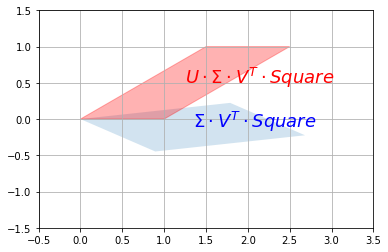

In [48]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Square$", "$U \cdot \Sigma \cdot V^T \cdot Square$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

### Eigenvectors and eigenvalues

An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$$M \cdot v = \lambda \times v$$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

For example, any horizontal vector remains horizontal after applying the shear mapping, so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are *NOT* eigenvectors of $M$.

If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.

However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors).

NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. Let's look at the eigenvectors and eigenvalues of the squeeze mapping matrix $F_{squeeze}$:

In [49]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [50]:
eigenvectors # [v0, v1, …]

array([[1., 0.],
       [0., 1.]])

Indeed the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714…, so far so good. Let's look at the shear mapping matrix $F_{shear}$:

In [51]:
eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2 # [λ0, λ1, …]

array([1., 1.])

In [52]:
eigenvectors2 # [v0, v1, …]

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

Wait, what!? We expected just one unit eigenvector, not two. The second vector is almost equal to $$\begin{pmatrix}-1 \\ 0 \end{pmatrix}$$, which is on the same line as the first vector $$\begin{pmatrix}1 \\ 0 \end{pmatrix}$$. This is due to floating point errors. We can safely ignore vectors that are (almost) colinear (ie. on the same line).